## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv") #reading in dataset as dataframe df
df.head() #examine the top five rows in df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0] #get the number of rows in df

294478

c. The number of unique users in the dataset.

In [4]:
df["user_id"].nunique() #the number of unique users in the dataset

290584

d. The proportion of users converted.

In [5]:
df["converted"].mean() #the proportion of users who converted is the mean of the 0s and 1s

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[(df["landing_page"]=="new_page") != (df["group"]=="treatment")].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum() #none of the rows have missing values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#drop the rows where new_page and treatment do not match, and create a new dataframe df2
df2 =df[~((df["landing_page"]=="new_page") != (df["group"]=="treatment"))]

In [9]:
# Double check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#find number of unique user_id in df2
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2["user_id"].duplicated()]["user_id"]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2["user_id"].duplicated()] #the row with duplicate user_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2= df2.drop_duplicates(subset = "user_id") #drop the row with duplicate user_id

In [14]:
df2[df2["user_id"].duplicated()] #confirming duplicate user_id row is deleted

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#the probability of a user converted regardless of page
#mean() counts the number of 1s (converted) and divides by the number of rows in converted
df2["converted"].mean() 

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control = df2[df2["group"]=="control"] #select just the control group
num_control = control.shape[0] #get the number of rows in the control group

#divide the number of controls that converted ("converted" == 1) by the number of rows
#in the control group to get the probability that if an individual was in the
#control group, what is the probability they converted
control_prob_conv = control.groupby(["converted"]).get_group(1)["group"].count()/num_control

print(control_prob_conv) 

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment = df2[df2["group"]=="treatment"] #select just the treatment group
num_treatment = treatment.shape[0] #get the number of rows in the treatment group

#divide the number of treatments that converted ("converted" == 1) by the number of rows
#in the treatment group to get the probability that if an individual was in the
#treatment group, what is the probability they converted
treatment_prob_conv = treatment.groupby(["converted"]).get_group(1)["group"].count()/num_treatment
print(treatment_prob_conv)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
#the probability that an individual received the new page is the 
#number of individuals who received the new page divided by the number of individuals
new_page = df2[df2["landing_page"]=="new_page"]
new_page.shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### Conclusion for Part I:
There is insufficient evidence to conclude that the new treatment page leads to more conversions. The probability that an individual received the new page is 0.5001, which is nearly equivalent to the probability that an individual received the old page. (1-0.5001=0.4999).  However, the probability that an individual in the "treatment" group, which viewed the new page, converted is 0.1188, which is less than the probability that an individual in the "control" group, which viewed the old page, converted at 0.1204. In fact, the probability that an individual converted, regardless of the type of page, is 0.1196, which is the mean of 0.1188 and 0.1204.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



Null hypothesis:  p_new-p_old <=0 (In other words, converted rate for new page is less than or equal to converted rate for old page)

Alternative hypothesis:  p_new-p_old > 0 (In other words, converted rate for new page is greater than the converted rate for old page).


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#Assume under the null hypothesis that p_new = p_old, and both are equal to the converted rate in ab_data.csv regardless of the page. 
#mean() counts the number of 1s (converted) and divides by the number of rows in converted

p_new = df2["converted"].mean() #calculate p_new based on these assumptions
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#calculate p_old
#mean() counts the number of 1s (converted) and divides by the number of rows in converted

p_old = df2["converted"].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [21]:
#select from df2 where group =="treatment" and find the number of rows to calculate n_new
n_new = df2[df2["group"]=="treatment"].shape[0]

print(n_new)

145310


d. What is $n_{old}$?

In [22]:
#select from df2 where group =="control" and find the number of rows to calculate n_old  

n_old = df2[df2["group"]=="control"].shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#use np.random.binomial to simulate n_new transactions with a convert rate of p_new under the null
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#use np.random.binomial to simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.002138087000413569

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
#simulate 10000 p_new and p_old values, take their difference and store the results in p_diffs
#We'll use np.random.binomial, which draws samples from a binomial distribution, to
#create a sampling of new page and old page distribution conversion rates, and create an array

p_diffs = []

new_page_converted = np.random.binomial(n_new,p_new, 10000)/n_new 
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
diff = new_page_converted - old_page_converted
p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

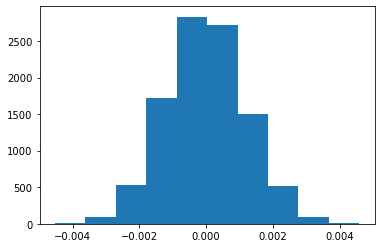

In [27]:
plt.hist(p_diffs); #plot a histogram of p_diffs; it is an almost-normal curve centered around zero

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
#calculate actual difference in the dataset between treatment/converted and control/converted
act_diffs= df2.query('group == "treatment"')['converted'].mean()-df2.query('group == "control"')['converted'].mean()

In [29]:
act_diffs

-0.0015782389853555567

In [30]:
p_diffs = np.array(p_diffs)
(p_diffs > act_diffs).mean()

0.9072

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j., we computed the p-value, which is the probability the observed difference in conversion rate between p_new and p_old is the result of random occurances (in other words, if the null hypothesis is true). In our case, the p-value is approximately 0.905, which is greater than 0.05, which means that we fail to reject the null hypothesis. In other words, any difference in the conversion rate between the new and old pages is not statistically significant.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[(df2["landing_page"]=="old_page") & (df2["converted"]==1)].shape[0]
convert_new = df2[(df2["landing_page"]=="new_page") & (df2["converted"]==1)].shape[0]
n_old = df2[df2["landing_page"]=="old_page"].shape[0]
n_new = df2[df2["landing_page"]=="new_page"].shape[0]

In [32]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
nobs = [n_new, n_old]
count = [convert_new, convert_old]
z_test , p_value = sm.stats.proportions_ztest(count, nobs, alternative ='larger')
z_test, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score and p-value computed in the previous question mean that the difference between conversion rates of the old and new pages are not statistically significant, and that they agree with the findings in parts j. and k. We would not reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since each row is either a conversion or a no conversion, we'll be performing a logistical regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#create dummies and add column ab_page, which is 1 when an individual receives the treatment and 0 if control
df2["ab_page"]= pd.get_dummies(df["group"])["treatment"] 
df2["intercept"]=1 #add intercept column, setting value to 1
df2.head() #revisit the first five rows in df2

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-07-06 22:19 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Here, the p-value for the observed differences between the new page and old page conversion rate is 0.19, which indicates that the difference between conversion rates of the old and new pages are not statistically significant. In part III, we fail to reject the null hypothesis.


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

Here, the p-value for the observed differences between the new page and old page conversion rate is 0.19. But the logistic regression is a two-tailed test (unlike Part II, which was a one-tail test), so to convert the p-values between each other, divide 0.19 by 2 to look at one tail only: 0.19/2 = 0.095. We subtract this from one because one tail: 1-0.095 = 0.905. This is nearly identical to the p-value from Part II. In any event, the p-value calculated in this section supports our analysis in Part II, which is that the p-value indicates that the difference between conversion rates of the old and new pages are not statistically significant, and once again, we fail to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factors to add into the regression model because there may be additional factors that affect conversion rate that we have considered and that might actually result in rejecting the null hypothesis. But adding factors into the regressional model reduces the number of degrees of freedom, and we might not be able to find these additional effects on conversion rate as a result.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  

No, as you will see below in further detail, country did not have an impactd on conversion.

In [36]:
countries = pd.read_csv('./countries.csv')
countries.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
df2 = df2.join(countries.set_index("user_id"), on="user_id")
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [38]:
### Create the necessary dummy variables

country_dummies = pd.get_dummies(df2['country'])
df2[['CA','UK','US']] = pd.get_dummies(df2.country)

In [39]:
df2.drop('CA',axis=1, inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,1


In [40]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-07-06 22:19 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [41]:
np.exp(results.params) #take the exponential of the coefficients when they are less than 1.

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

In [42]:
1/_

intercept    7.614303
ab_page      1.015056
UK           0.950621
US           0.960062
dtype: float64

If an individual is in Canada, they are 0.96 times as to convert than in the US and 0.95 times as likely to convert than in the UK, holding all other variables constant.  However, none of the country variables appear to be statistically significant since all p-values are over 0.05. Once again, it appears that we cannot reject the null hypothesis that the old page results in an equal number or more conversions than the new page. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# we need to create additional interaction columns to find out if there is an interaction 
# between page and country to see if there are significant effects on conversion

df2["US_ab_page"] = df2["US"]*df2["ab_page"]
df2["UK_ab_page"] = df2["UK"]*df2["ab_page"]

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', "UK_ab_page", "US_ab_page", "UK", "US"]])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-07-06 22:19 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
==================================================================

"""

In [44]:
np.exp(results.params)

intercept     0.134794
ab_page       0.934776
UK_ab_page    1.081428
US_ab_page    1.048001
UK            1.011854
US            1.017682
dtype: float64

In [45]:
1/_

intercept     7.418713
ab_page       1.069775
UK_ab_page    0.924703
US_ab_page    0.954198
UK            0.988285
US            0.982625
dtype: float64

None of the country dependent conversion variables appear to be statistically significant since all p-values are over 0.05. Yet again, it appears that we cannot reject the null hypothesis that the old page results in an equal number or more conversions than the new page. 

<a id='conclusions'></a>
## Conclusions

We took multiple approaches to examine the conversion rate of the old page vs. the new page.

Based on our analyses, we cannot reject the null hypothesis that the old page results in the same or more conversions as the new page. 

First, examining the dataset, the probability that an individual received the new page is 0.5001, which is nearly equivalent to the probability that an individual received the old page. (1-0.5001=0.4999). However, the probability that an individual in the "treatment" group, which viewed the new page, converted is 0.1188, which is less than the probability that an individual in the "control" group, which viewed the old page, converted at 0.1204. In fact, the probability that an individual converted, regardless of the type of page, is 0.1196, which is the mean of 0.1188 and 0.1204.

Second, we created a simulation that drew 10,000 samples from a binomial distribution to compute the difference between new page conversions (p_new) and old page (p_old conversions and compare them with the actual difference between new page and old conversions to get the p-value, which is the probability the observed difference in conversion rate between p_new and p_old is the result of random occurances (in other words, if the null hypothesis is true). In our case, the p-value is approximately 0.905, which is greater than 0.05, which means that we fail to reject the null hypothesis. In other words, any difference in the conversion rate between the new and old pages is not statistically significant.

Next, we used stats.proportions_ztest to compute a Z-test statistic and p-value. The Z-test statistic was about -1.3 and the p-value was again 0.905.  The z-score and p-value indicate that the difference between conversion rates of the old and new pages are not statistically significant, and that they agree with the earlier findings. Once again, we would not reject the null hypothesis.

Then, we used statsmodels to conduct a logistic regression. We added an intercept column, as well as an ab_page column of dummy variables, which is 1 when an individual receives the treatment and 0 if control. The p-value for the observed differences between the new page and old page conversion rate is 0.19. But the logistic regression is a two-tailed test (unlike Part II, which was a one-tail test), so to convert the p-values between each other, divide 0.19 by 2 to look at one tail only: 0.19/2 = 0.095. We subtract this from one because one tail: 1-0.095 = 0.905. This is nearly identical to the p-value from the earlier analyses In any event, the p-value calculated in this section supports our previous analysis, which is that the p-value indicates that the difference between conversion rates of the old and new pages are not statistically significant, and once again, we fail to reject the null hypothesis.

We then looked at whether country had an impact on conversion. We added data indicating the country the individual was from: Canada, UK or US, converted that data to dummy variables, and conducted a logistic regression. If an individual is in Canada, they are 0.96 times as to convert than in the US and 0.95 times as likely to convert than in the UK, holding all other variables constant. However, none of the country variables appear to be statistically significant since all p-values are over 0.05. Once again, it appears that we cannot reject the null hypothesis that the old page results in an equal number or more conversions than the new page.

Finally, there is no significant p-value even after the addition of country dependent conversion variables and therefore we fail to reject the null. None of the country dependent conversion variables appear to be statistically significant since all p-values are over 0.05. Yet again, it appears that we cannot reject the null hypothesis that the old page results in an equal number or more conversions than the new page. 

There may be other factors to consider for future analysis, such as the amount of time spent viewing the new page/old page or the gender or age of the viewer, assuming such data is available. It is a good idea to consider other factors to add into the regression model because there may be additional factors that affect conversion rate that we have considered and that might actually result in rejecting the null hypothesis. But adding factors into the regressional model reduces the number of degrees of freedom, and we might not be able to find these additional effects on conversion rate as a result.

### Other References
I looked at Stack Overflow, the video lessons and the Knowledge Base for clarification of certain concepts in Numpy, Python and statistics.